In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("/Users/yashasva/Documents/Softsensor assignment/Assignment 1/Data_problem _1.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

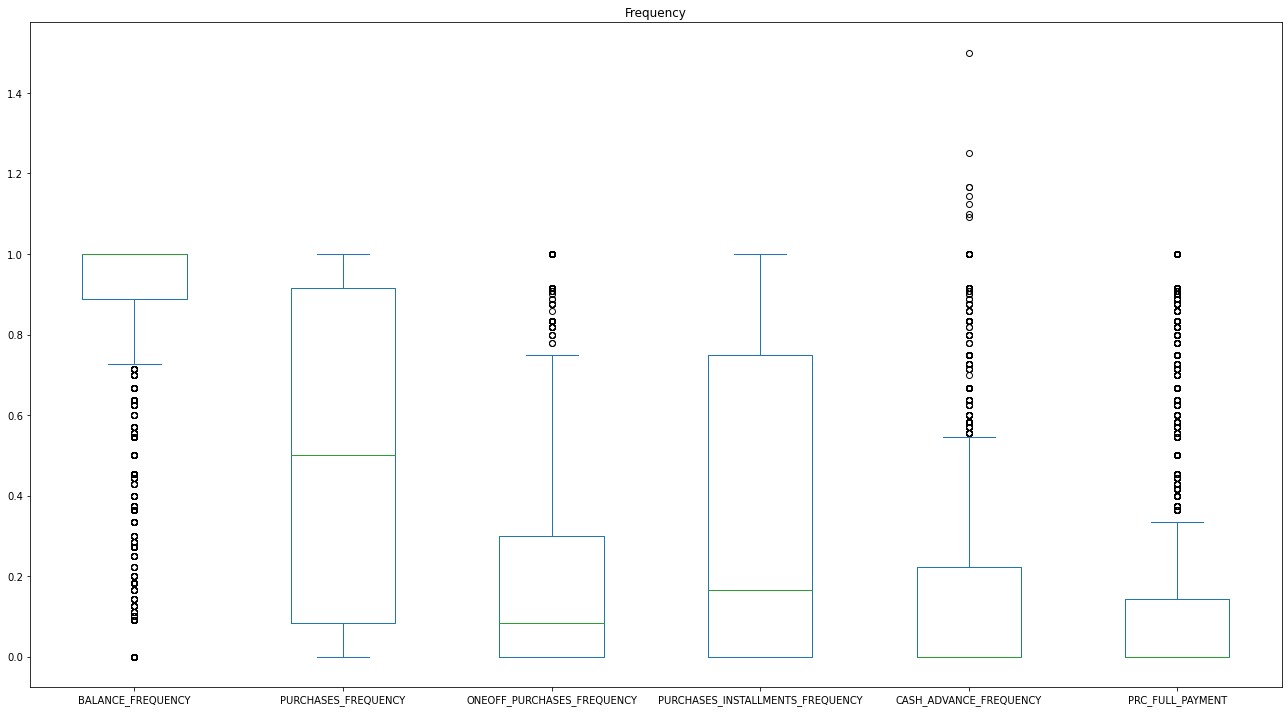

In [6]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

In [7]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [8]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 

In [9]:
df.isnull().sum().sort_values(ascending=False)

CREDIT_LIMIT                        1
CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [10]:
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean()) 

In [11]:
df.isnull().sum().sort_values(ascending=False)  

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

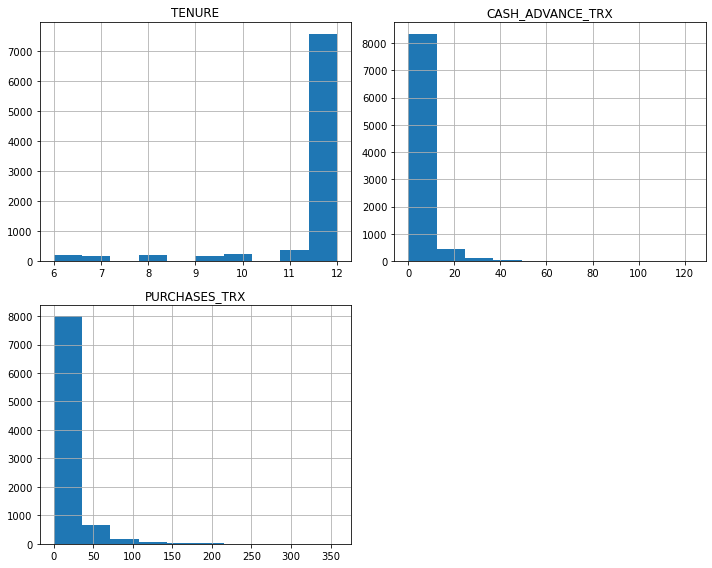

In [12]:
df[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

In [13]:
df.drop("CUST_ID", axis=1, inplace=True)
df.columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [22]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.cluster import KMeans
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [23]:
df_nor = normalize(df_std) 
# View the new feature data's shape 
df_nor.shape 

(8950, 17)

In [24]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2).fit(df_nor)

df_pca2 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (8950, 17)
transformed shape: (8950, 2)


In [25]:
df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['Principal_1', 'Principal_2']
df_pca.head()

,Principal_1,Principal_2
0,-0.489826,-0.679678
1,-0.518791,0.545011
2,0.330885,0.268977
3,-0.482374,-0.092112
4,-0.563289,-0.481914


In [26]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

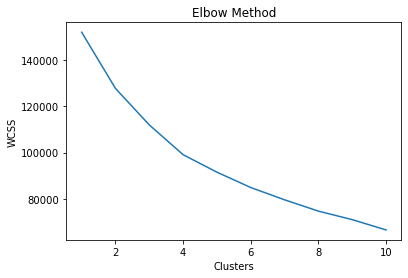

In [27]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

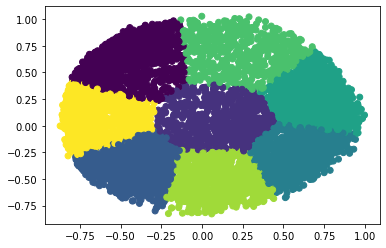

In [28]:
plt.scatter(df_pca['Principal_1'], df_pca['Principal_2'],
            c = KMeans(n_clusters=8, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

In [29]:
print(pca.explained_variance_)

[0.28409283 0.1799108 ]


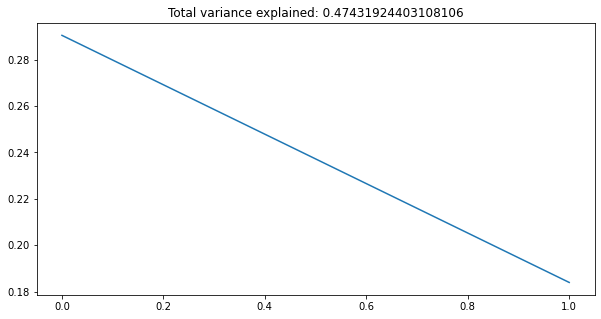

In [37]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()